In [2]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import pandas as pd

**Binary classifier:**

In [3]:
x = np.array([[3,2],[4,-1], [- 1, 3], [1.5, 1.5], [2, 3.5], [-1.5, -1], [1, -0.5], [2, -3], [4.5, -2]])
X = pd.DataFrame(x, columns=['x11', 'x12'])

theta = np.array([- 1, 1.5]).reshape(2, 1)
theta_null = 3
h = []

for i in range(x.shape[0]):
    y = x[i,:].reshape(2, 1)
    z = np.matmul(theta.T, y) + theta_null
    h.append(np.sign(z)[0][0])
    
X = X.assign(h = h)

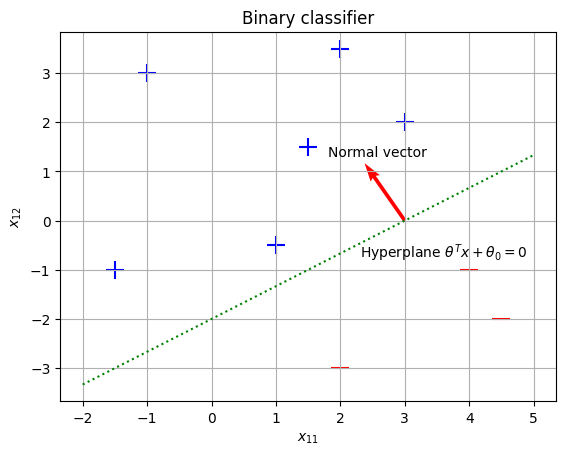

In [4]:
plt.scatter(X[X['h'] > 0]['x11'], X[X['h'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(X[X['h'] < 0]['x11'], X[X['h'] < 0]['x12'], marker='_', s=150, c='r')
plt.plot(np.linspace(-2, 5, num=10), (np.linspace(-2, 5, num=10) - 3)/1.5, 'g:')
plt.text(2.3, -0.75, 'Hyperplane $\\theta^T x + \\theta_0 = 0$')

plt.quiver(3, 0, - 0.7, 1, color='r', units='xy', scale=1)
plt.text(1.8, 1.3, 'Normal vector')

plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')
plt.title('Binary classifier')
plt.grid()
plt.show() 

**Perceptron Algorithm:**

In [11]:
x = np.array([[1,3],[2.5, 1.5], [-1.5, 1.5]])
X = pd.DataFrame(x, columns=['x11', 'x12'])

theta = np.array([1, - 1]).reshape(2, 1)
theta_null = 1

h = []
for i in range(x.shape[0]):
    y = x[i,:].reshape(2, 1)
    z = np.matmul(theta.T, y) + theta_null
    h.append(np.sign(z)[0][0])
    
X = X.assign(h1 = h)

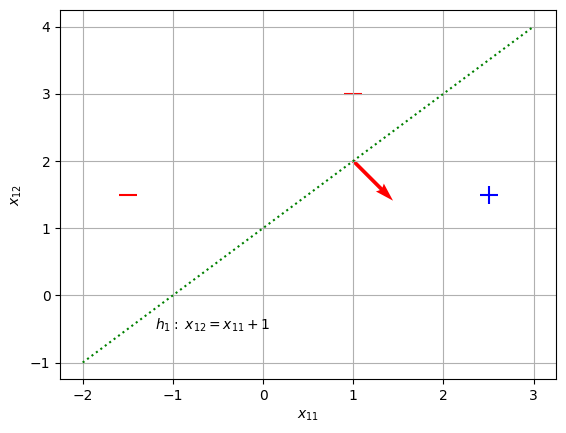

In [12]:
plt.scatter(X[X['h1'] > 0]['x11'], X[X['h1'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(X[X['h1'] < 0]['x11'], X[X['h1'] < 0]['x12'], marker='_', s=150, c='r')
plt.plot(np.linspace(-2, 3, num=10), np.linspace(-2, 3, num=10) + 1, 'g:')
plt.text(-1.2, -0.5, '$h_1:$ $x_{12} = x_{11} + 1$')
plt.quiver(1, 2, 0.5, -0.5, color='r', units='xy', scale=1)
plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')
plt.grid()

In [13]:
changed = False

for t in range(1):
    for i in range(x.shape[0]):
        x_i = x[i,:].reshape(2, 1)
        y = np.matmul(theta.T, x_i) + theta_null
        if y <= 0:
            theta = theta + y*x_i
            theta_null = theta_null + y
            changed = True
    if changed == False:
        break

h = []
for i in range(x.shape[0]):
    y = x[i,:].reshape(2, 1)
    z = np.matmul(theta.T, y) + theta_null
    h.append(np.sign(z)[0][0])
    
X = X.assign(h2 = h)

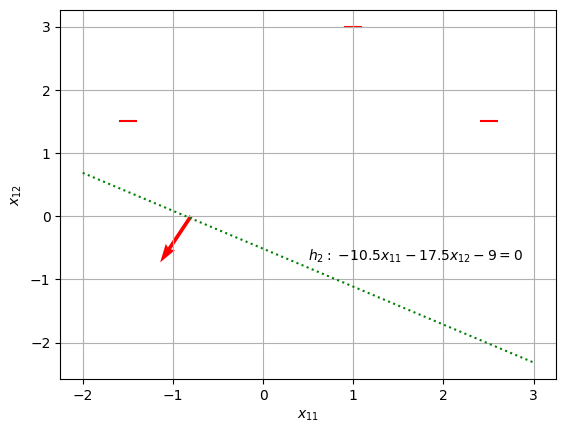

In [30]:
plt.scatter(X[X['h2'] > 0]['x11'], X[X['h2'] > 0]['x12'], marker='+', s=150, c='b')
plt.scatter(X[X['h2'] < 0]['x11'], X[X['h2'] < 0]['x12'], marker='_', s=150, c='r')
plt.plot(np.linspace(-2, 3, num=10), (-10.5*np.linspace(-2, 3, num=10) - 9)/17.5, 'g:')
plt.text(0.5, -0.7, '$h_2:$ $- 10.5 x_{11} - 17.5 x_{12} - 9 = 0$')
plt.quiver(-0.8, 0, -0.4, -0.6, color='r', units='xy', scale=1)
plt.xlabel('$x_{11}$')
plt.ylabel('$x_{12}$')
plt.grid()